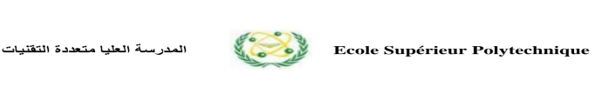

# Optimisation du Taux de Conversion sur un Site Web : Analyse et Recommandations pour Améliorer les Performances Commerciales

<center>22068 _ 22092 _ 22106</center>

## 1. BUSINESS UNDERSTANDING

### 1.1 Présentation des Données et Objectifs

Les données que nous avons à notre disposition sont issues du site web d'une entreprise anonyme. Elles comprennent les caractéristiques suivantes pour chaque utilisateur :

- **Pays (country) :** Le pays de provenance de l'utilisateur.
- **Âge (age) :** L'âge de l'utilisateur.
- **Nouvel utilisateur (new_user) :** Un indicateur binaire indiquant si l'utilisateur est un nouvel utilisateur ou non.
- **Source (source) :** La source par laquelle l'utilisateur a accédé au site web (publicité, SEO, direct, etc.).
- **Nombre total de pages visitées (total_pages_visited) :** Le nombre total de pages visitées par l'utilisateur.
- **Conversion (converted) :** Un indicateur binaire indiquant si l'utilisateur a converti ou non (0 pour non, 1 pour oui).

Ces données nous permettront d'analyser le comportement des utilisateurs sur le site web et de construire un modèle de prédiction du taux de conversion.

### Objectifs

Notre objectif principal est d'optimiser le taux de conversion des utilisateurs sur le site web de l'entreprise. Pour ce faire, nous nous fixons les objectifs suivants :

1. **Créer un modèle de prédiction du taux de conversion :** Nous allons utiliser les données disponibles pour développer un modèle capable de prédire si un utilisateur va convertir ou non sur le site web.
  
2. **Fournir des recommandations à l'équipe Produit & Marketing :** Nous analyserons les facteurs qui influent sur le taux de conversion et formulerons des recommandations spécifiques à l'équipe Produit & Marketing afin d'améliorer ce taux et d'augmenter les revenus de l'entreprise.

En suivant ces objectifs, nous espérons contribuer à l'optimisation des performances commerciales de l'entreprise en ligne.

### 1.2 Les variables

#### Variables explicatives

1. **Pays (country) :** Le pays d'origine de l'utilisateur.
2. **Âge (age) :** L'âge de l'utilisateur.
3. **Nouvel utilisateur (new_user) :** Un indicateur binaire indiquant si l'utilisateur est un nouvel utilisateur ou non.
4. **Source (source) :** La source par laquelle l'utilisateur a accédé au site web (publicité, SEO, direct, etc.).
5. **Nombre total de pages visitées (total_pages_visited) :** Le nombre total de pages visitées par l'utilisateur.

#### Variable cible

- **Conversion (converted) :** Un indicateur binaire indiquant si l'utilisateur a converti ou non (0 pour non, 1 pour oui). Cette variable sera notre cible pour la prédiction du taux de conversion.


## 2. Data Preparation & Data Exploration

Dans cette section, nous préparons les données pour notre étude et explorons les caractéristiques du jeu de données.


### 2.1 Importation du jeu de données

In [5]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('conversion_data.csv')
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


### 2.2 Data Exploration

In [6]:
nombre_lignes, nombre_colonnes = data.shape
print("Nombre de lignes :", nombre_lignes)
print("Nombre de colonnes :", nombre_colonnes)

Nombre de lignes : 316200
Nombre de colonnes : 6


Le jeu de données initial comprend 316200 lignes et 6 colonnes.

In [7]:
data.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [8]:
proportions_valeurs_manquantes = data.isna().mean()
print("Proportions de valeurs manquantes pour chaque colonne :\n")
print(proportions_valeurs_manquantes)

Proportions de valeurs manquantes pour chaque colonne :

country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64


In [9]:

descriptives_stats = data.describe()
print("Statistiques descriptives :\n", descriptives_stats)

Statistiques descriptives :
                  age       new_user  total_pages_visited      converted
count  316200.000000  316200.000000        316200.000000  316200.000000
mean       30.569858       0.685465             4.872966       0.032258
std         8.271802       0.464331             3.341104       0.176685
min        17.000000       0.000000             1.000000       0.000000
25%        24.000000       0.000000             2.000000       0.000000
50%        30.000000       1.000000             4.000000       0.000000
75%        36.000000       1.000000             7.000000       0.000000
max       123.000000       1.000000            29.000000       1.000000


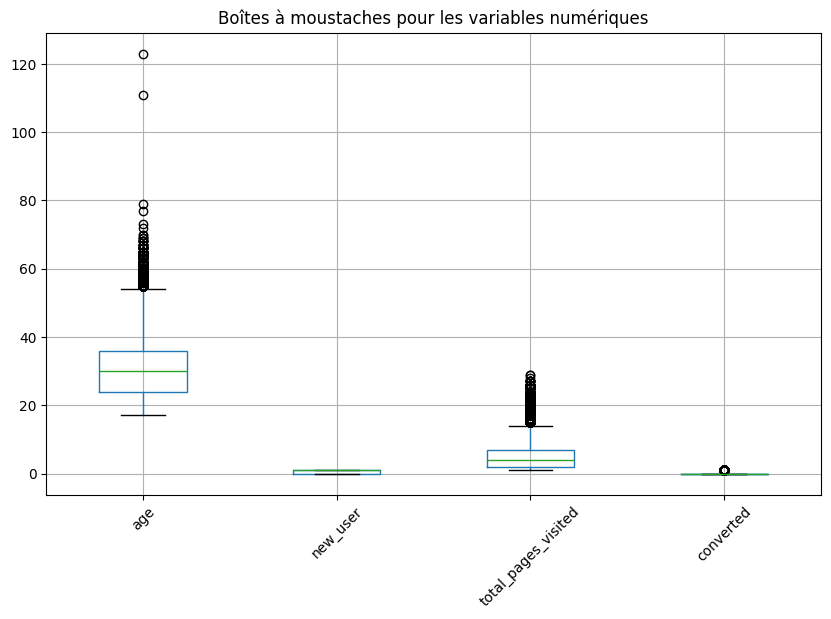

In [10]:
import matplotlib.pyplot as plt

colonnes_numeriques = data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
colonnes_numeriques.boxplot()
plt.title("Boîtes à moustaches pour les variables numériques")
plt.xticks(rotation=45)
plt.show()

le diagramme en boîtes à moustaches pour la colonne 'age' montre une distribution généralement concentrée autour de la médiane, avec deux valeurs aberrantes clairement identifiables au-dessus des moustaches. Cela suggère la présence potentielle de valeurs aberrantes dans la distribution des âges. Pour les autres colonnes, telles que 'new_user', 'total_pages_visited' et 'converted', aucune valeur aberrante n'est visuellement apparente, ce qui indique une distribution normale pour ces variables.

In [11]:
top_3_max_age = data['age'].nlargest(3)

print("Top 3 maximum values in age:")
print(top_3_max_age)

Top 3 maximum values in age:
90928     123
295581    111
265167     79
Name: age, dtype: int64


In [12]:
age_median = data['age'].median()

# Replace outliers with the median value
data.loc[data['age'] > 100, 'age'] = age_median

# Verify the changes
print("Top 3 maximum values in age after replacing outliers with median:")
print(data['age'].nlargest(3))

Top 3 maximum values in age after replacing outliers with median:
265167    79
192644    77
154217    73
Name: age, dtype: int64


Nous avons identifié trois valeurs aberrantes dans la colonne 'age' (123, 111 et 79) et les avons remplacées par la médiane de cette colonne pour garantir la fiabilité de nos analyses.

# 3.Data visualisation

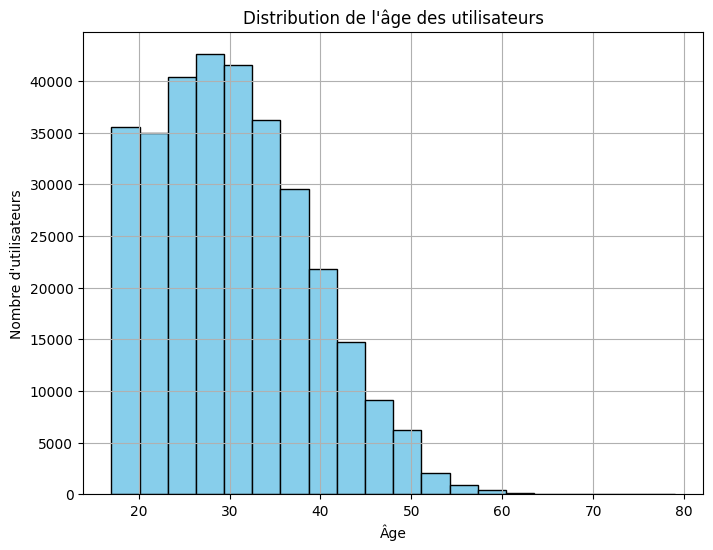

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution de l\'âge des utilisateurs')
plt.xlabel('Âge')
plt.ylabel('Nombre d\'utilisateurs')
plt.grid(True)
plt.show()

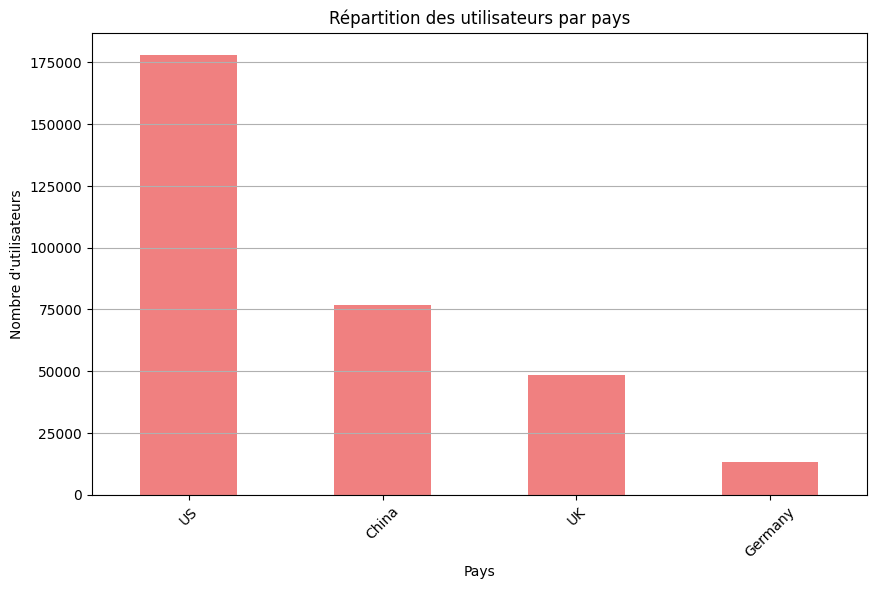

In [14]:
plt.figure(figsize=(10, 6))
data['country'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Répartition des utilisateurs par pays')
plt.xlabel('Pays')
plt.ylabel('Nombre d\'utilisateurs')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

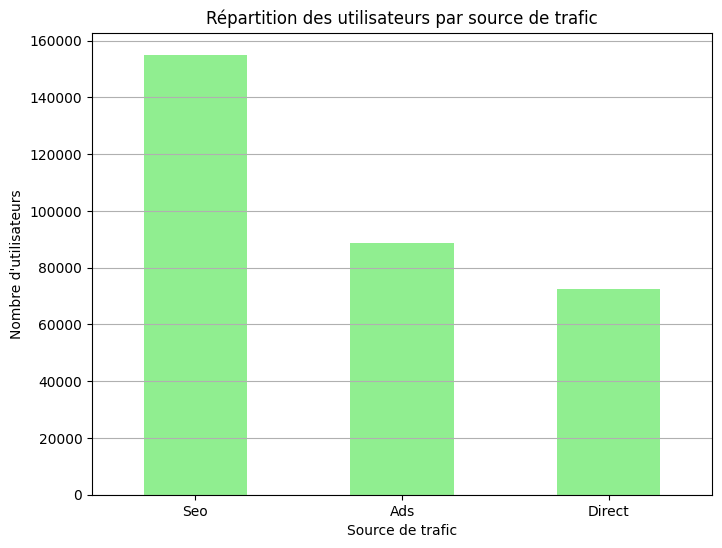

In [16]:
plt.figure(figsize=(8, 6))
data['source'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Répartition des utilisateurs par source de trafic')
plt.xlabel('Source de trafic')
plt.ylabel('Nombre d\'utilisateurs')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

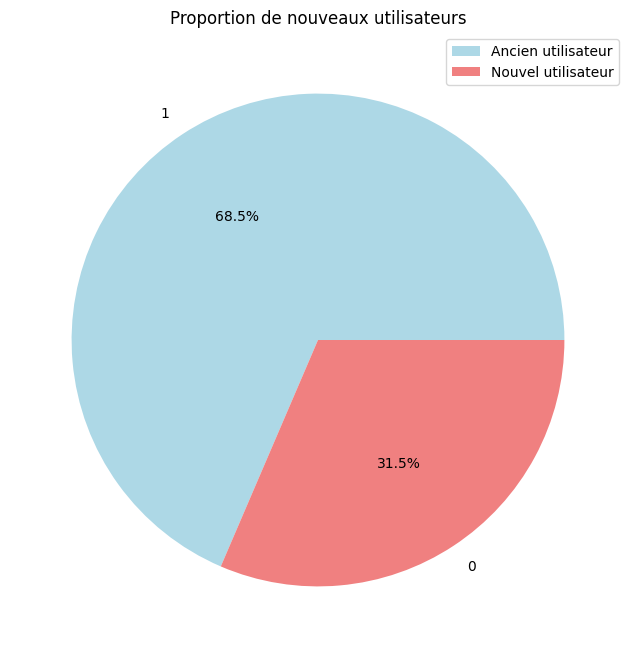

In [17]:
plt.figure(figsize=(8, 8))
data['new_user'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Proportion de nouveaux utilisateurs')
plt.ylabel('')
plt.legend(['Ancien utilisateur', 'Nouvel utilisateur'], loc='upper right')
plt.show()

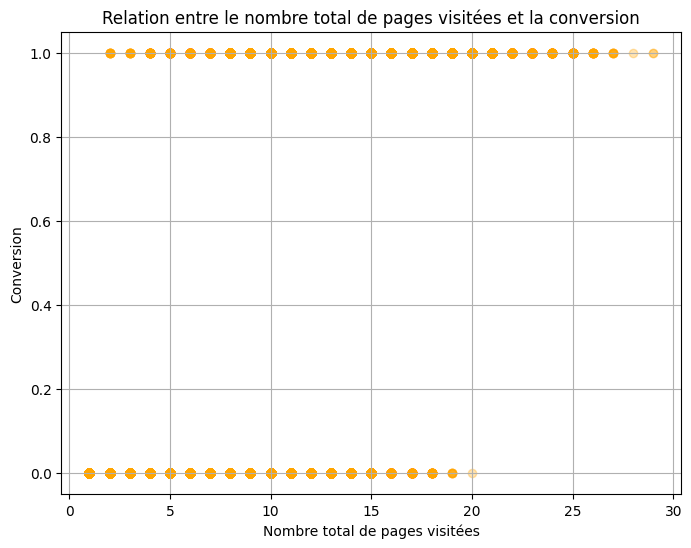

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(data['total_pages_visited'], data['converted'], alpha=0.3, color='orange')
plt.title('Relation entre le nombre total de pages visitées et la conversion')
plt.xlabel('Nombre total de pages visitées')
plt.ylabel('Conversion')
plt.grid(True)
plt.show()

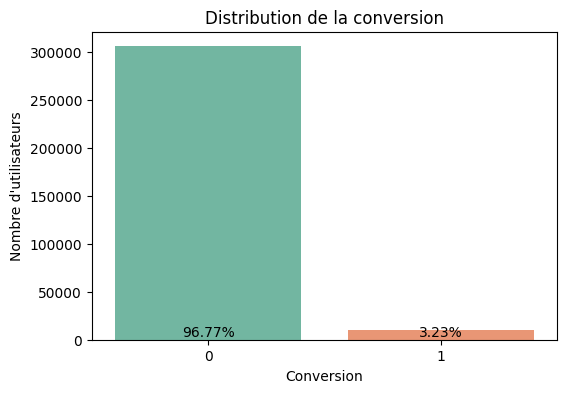

In [39]:
import seaborn as sns

conversion_percentage = data['converted'].value_counts(normalize=True) * 100

# Créer le graphique
plt.figure(figsize=(6, 4))
sns.countplot(x='converted', data=data, palette='Set2')

# Ajouter les pourcentages au-dessus des barres
for index, value in enumerate(conversion_percentage):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('Distribution de la conversion')
plt.xlabel('Conversion')
plt.ylabel("Nombre d'utilisateurs")
plt.show()

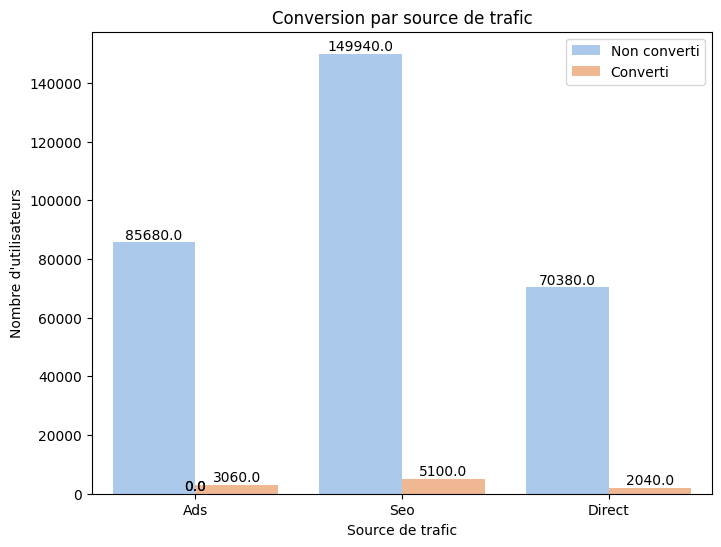

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='source', hue='converted', data=data, palette='pastel')
for p in plt.gca().patches:
    plt.gca().annotate('{:.1f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                       textcoords='offset points')
plt.title('Conversion par source de trafic')
plt.xlabel('Source de trafic')
plt.ylabel('Nombre d\'utilisateurs')
plt.legend(['Non converti', 'Converti'], loc='upper right')
plt.xticks(rotation=0)
plt.show()

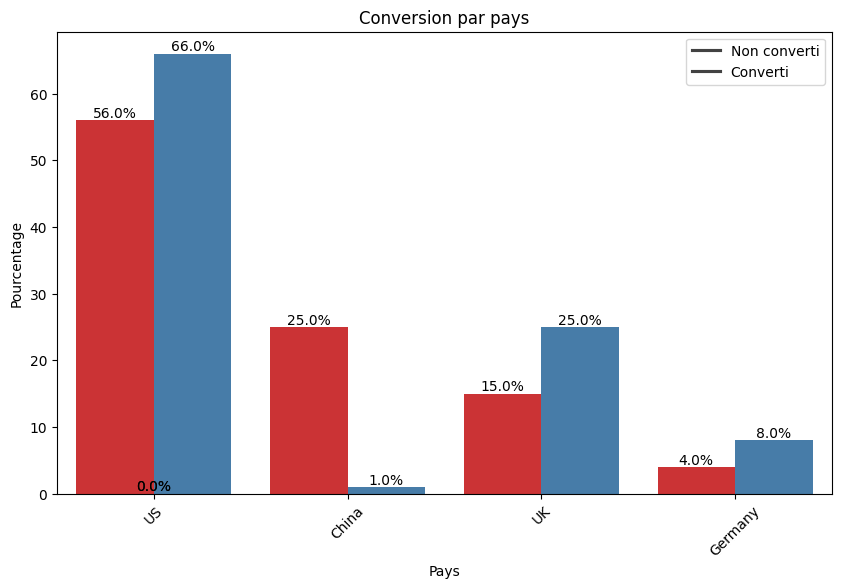

In [45]:
conversion_counts = data['country'].groupby(data['converted']).value_counts(normalize=True).mul(100).rename('percentage').reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='percentage', hue='converted', data=conversion_counts, palette='Set1')

for p in plt.gca().patches:
    plt.gca().annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.title('Conversion par pays')
plt.xlabel('Pays')
plt.ylabel('Pourcentage')
plt.xticks(rotation=45)
plt.legend(['Non converti', 'Converti'], loc='upper right')
plt.show()


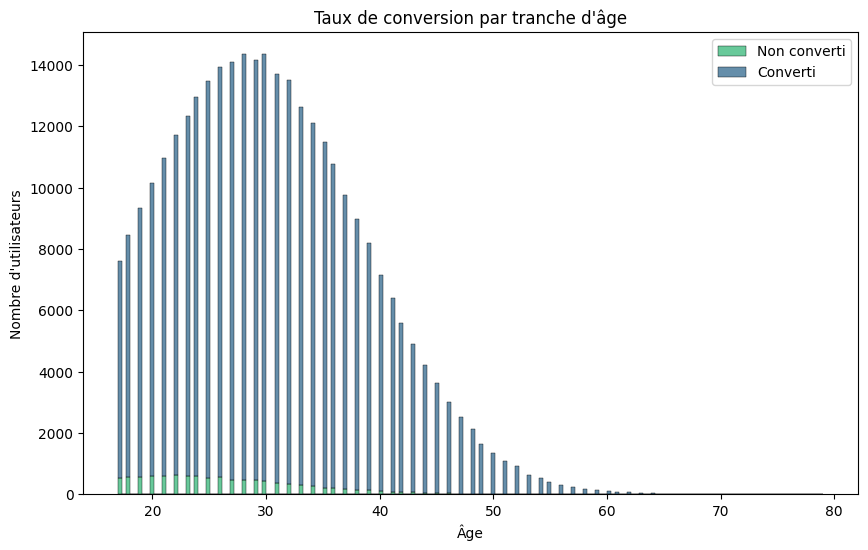

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='converted', multiple='stack', palette='viridis')
plt.title('Taux de conversion par tranche d\'âge')
plt.xlabel('Âge')
plt.ylabel('Nombre d\'utilisateurs')
plt.legend(['Non converti', 'Converti'])
plt.show()

# 4.1_Modelisation 

1.modèle de forêt aléatoire (Random Forest Classifier).

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score


X = data.drop('converted', axis=1)  
y = data['converted'] 

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))


Accuracy: 0.9850727387729286
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61217
           1       0.82      0.68      0.74      2023

    accuracy                           0.99     63240
   macro avg       0.91      0.84      0.87     63240
weighted avg       0.98      0.99      0.98     63240

ROC-AUC Score: 0.8376631800113744


Les résultats de l'évaluation du modèle de classification Random Forest sont les suivants :

- L'accuracy du modèle est d'environ 98.5%, ce qui signifie qu'il prédit correctement la classe des échantillons dans environ 98.5% des cas.
- La précision pour la classe majoritaire (classe 0) est de 99%, tandis que pour la classe minoritaire (classe 1), elle est de 82%. Cela indique que la plupart des prédictions pour la classe 0 sont correctes, mais il y a une certaine incertitude dans les prédictions pour la classe 1.
- Le rappel pour la classe 0 est de 100%, indiquant que tous les échantillons réellement de la classe 0 ont été correctement prédits, tandis que pour la classe 1, il est de 68%, montrant qu'une partie des échantillons de la classe 1 n'ont pas été correctement prédits.
- Le F1-score, une mesure combinée de la précision et du rappel, est de 99% pour la classe 0 et de 74% pour la classe 1.
- Le score ROC-AUC, une mesure de la capacité du modèle à distinguer entre les classes, est d'environ 0.84, ce qui indique une performance raisonnable dans la distinction entre les classes.


2.Regression logistique

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score


X = data.drop('converted', axis=1)  
y = data['converted']  


X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_logistic = LogisticRegression(random_state=42)
model_logistic.fit(X_train, y_train)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

y_pred = model_logistic.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))



Accuracy: 0.9850727387729286
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61217
           1       0.85      0.69      0.76      2023

    accuracy                           0.99     63240
   macro avg       0.92      0.84      0.88     63240
weighted avg       0.99      0.99      0.99     63240

ROC-AUC Score: 0.8442341701370095


Voici une interprétation concise des résultats pour le modèle de régression logistique :

- L'accuracy du modèle est d'environ 98.5%, indiquant qu'il prédit correctement la classe des échantillons dans environ 98.5% des cas.
- Pour la classe majoritaire (classe 0), la précision est de 99% et le rappel est de 100%. Cela signifie que la plupart des échantillons prédits comme appartenant à la classe 0 le sont effectivement, et tous les échantillons réellement de la classe 0 ont été correctement prédits.
- Pour la classe minoritaire (classe 1), la précision est de 85% et le rappel est de 69%. Cela montre que seule une partie des échantillons réellement de la classe 1 ont été correctement prédits.
- Le F1-score, une mesure combinée de la précision et du rappel, est de 99% pour la classe 0 et de 76% pour la classe 1.
- Le score ROC-AUC est d'environ 0.84, indiquant une performance raisonnable du modèle dans la distinction entre les classes.

Globalement, le modèle de régression logistique montre une performance élevée, mais avec une légère baisse de précision pour la classe minoritaire par rapport à la classe majoritaire.


3.Gradient boosting 

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score



X = data.drop('converted', axis=1)  
y = data['converted']  

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)



accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



y_pred = model_gb.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))


Accuracy: 0.9862270714737508
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61217
           1       0.85      0.69      0.76      2023

    accuracy                           0.99     63240
   macro avg       0.92      0.84      0.88     63240
weighted avg       0.99      0.99      0.99     63240

ROC-AUC Score: 0.8447121501785289


Voici une interprétation concise des résultats pour le modèle Gradient Boosting Classifier :

- **Accuracy (Précision)** : L'accuracy du modèle est d'environ 98.6%, ce qui signifie qu'il prédit correctement la classe des échantillons dans environ 98.6% des cas.

- **Classification Report (Rapport de classification)** :
   - Pour la classe 0 : La précision est de 99%, le rappel est de 100%, et le F1-score est de 99%. Cela indique que la plupart des échantillons prédits comme appartenant à la classe 0 le sont effectivement, et tous les échantillons réellement de la classe 0 ont été correctement prédits.
   - Pour la classe 1 : La précision est de 85%, le rappel est de 69%, et le F1-score est de 76%. Cela montre que seule une partie des échantillons réellement de la classe 1 ont été correctement prédits.

- **ROC-AUC Score** : Le score ROC-AUC est d'environ 0.84, indiquant une performance raisonnable du modèle dans la distinction entre les classes.

Globalement, le modèle de Gradient Boosting Classifier montre une performance similaire au modèle de régression logistique, avec une accuracy élevée et des scores de précision et de rappel légèrement inférieurs pour la classe minoritaire par rapport à la classe majoritaire.


4.KNN model

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score



X = data.drop('converted', axis=1)  
y = data['converted']  

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_pred = model_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))


Accuracy: 0.9848197343453511
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61217
           1       0.82      0.67      0.74      2023

    accuracy                           0.98     63240
   macro avg       0.91      0.83      0.87     63240
weighted avg       0.98      0.98      0.98     63240

ROC-AUC Score: 0.8325137069219115


Voici une interprétation concise des résultats pour le modèle K-Nearest Neighbors (KNN) :

- **Accuracy (Précision)** : L'accuracy du modèle est d'environ 98.5%, ce qui signifie qu'il prédit correctement la classe des échantillons dans environ 98.5% des cas.

- **Classification Report (Rapport de classification)** :
   - Pour la classe 0 : La précision est de 99%, le rappel est de 100%, et le F1-score est de 99%. Cela indique que la plupart des échantillons prédits comme appartenant à la classe 0 le sont effectivement, et tous les échantillons réellement de la classe 0 ont été correctement prédits.
   - Pour la classe 1 : La précision est de 82%, le rappel est de 67%, et le F1-score est de 74%. Cela montre que seule une partie des échantillons réellement de la classe 1 ont été correctement prédits.

- **ROC-AUC Score** : Le score ROC-AUC est d'environ 0.83, indiquant une performance raisonnable du modèle dans la distinction entre les classes.

Globalement, le modèle de K-Nearest Neighbors (KNN) montre une performance similaire aux modèles précédents, avec une accuracy élevée mais des scores de précision et de rappel légèrement inférieurs pour la classe minoritaire par rapport à la classe majoritaire.


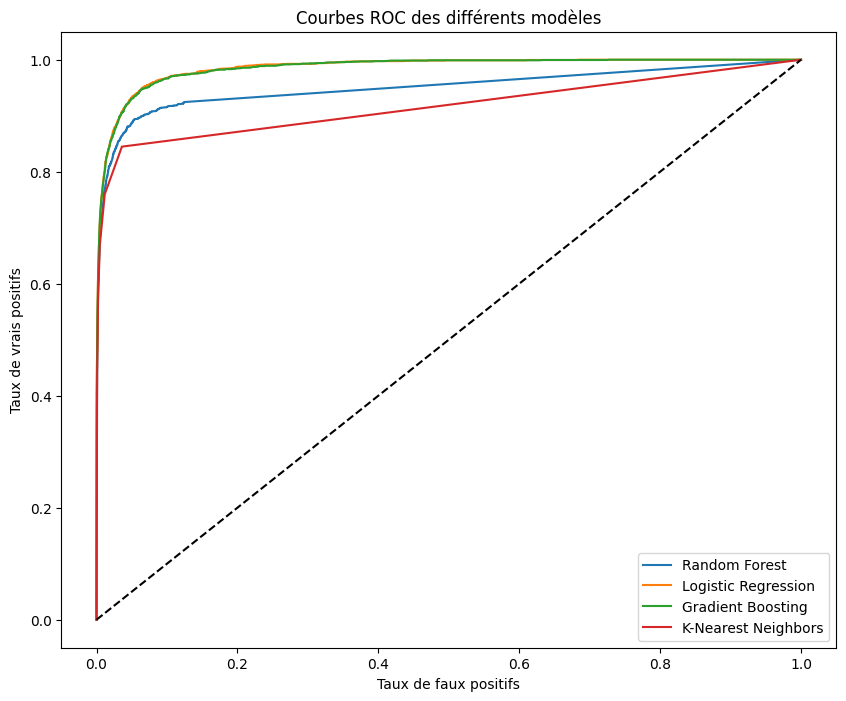

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_scores_rf = model_rf.predict_proba(X_test)[:, 1]
y_scores_logistic = model_logistic.predict_proba(X_test)[:, 1]
y_scores_gb = model_gb.predict_proba(X_test)[:, 1]
y_scores_knn = model_knn.predict_proba(X_test)[:, 1]


fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_scores_logistic)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_scores_gb)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores_knn)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression')
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbors')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC des différents modèles')
plt.legend()
plt.show()


# 4.2_ prediction 

In [31]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier




data_train = pd.read_csv('conversion_data.csv')

data_train['age'] = pd.to_numeric(data_train['age'], errors='coerce')  
categorical_columns = ['country', 'source']  
numerical_columns = ['age', 'total_pages_visited']  
all_columns = categorical_columns + numerical_columns  
X_train = data_train[all_columns]
y_train = data_train['converted']


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)

data_test = pd.read_csv("conversion_data_test.csv")

X_test_new = data_test[all_columns]

predictions_new = pipeline.predict(X_test_new)

print("Prédictions pour les nouvelles données de test :")
print(predictions_new)



Prédictions pour les nouvelles données de test :
[1 0 0 ... 0 1 0]


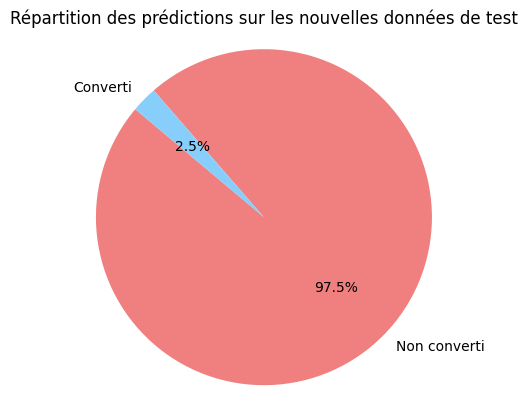

In [32]:
import matplotlib.pyplot as plt


prediction_counts = pd.Series(predictions_new).value_counts()

prediction_percentages = prediction_counts / len(predictions_new) * 100

labels = ['Non converti', 'Converti']

colors = ['lightcoral', 'lightskyblue']

plt.pie(prediction_percentages, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Répartition des prédictions sur les nouvelles données de test')
plt.show()


In [33]:

prediction_counts = pd.Series(predictions_new).value_counts()


for label, count in prediction_counts.items():
    print(f"{label}: {count}")


0: 30830
1: 790


# 4.3 _Recommandation

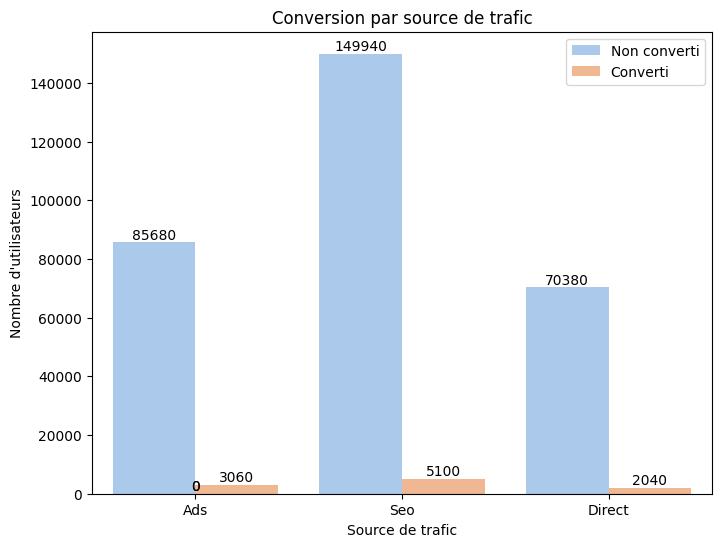

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='source', hue='converted', data=data_train, palette='pastel')

# Ajouter les annotations avec les nombres
for p in plt.gca().patches:
    height = p.get_height()
    if not pd.isnull(height):
        plt.gca().annotate('{}'.format(int(height)), (p.get_x() + p.get_width() / 2., height), 
                           ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                           textcoords='offset points')

plt.title('Conversion par source de trafic')
plt.xlabel('Source de trafic')
plt.ylabel("Nombre d'utilisateurs")
plt.legend(['Non converti', 'Converti'], loc='upper right')
plt.xticks(rotation=0)
plt.show()


In [35]:
count_table = data_train.groupby(['source', 'converted']).size().unstack(fill_value=0)
print(count_table)


converted       0     1
source                 
Ads         85680  3060
Direct      70380  2040
Seo        149940  5100


Optimisation des Sources de Trafic :

- Les données indiquent que la source de trafic SEO génère le plus grand nombre de conversions, suivie par les Ads et enfin Direct.
- Il serait judicieux d'allouer davantage de ressources et d'efforts pour renforcer la stratégie SEO, étant donné sa forte contribution aux conversions.

- Considérez l'expansion des initiatives SEO réussies tout en recherchant des stratégies innovantes pour augmenter le taux de conversion des sources de trafic Ads et Direct.


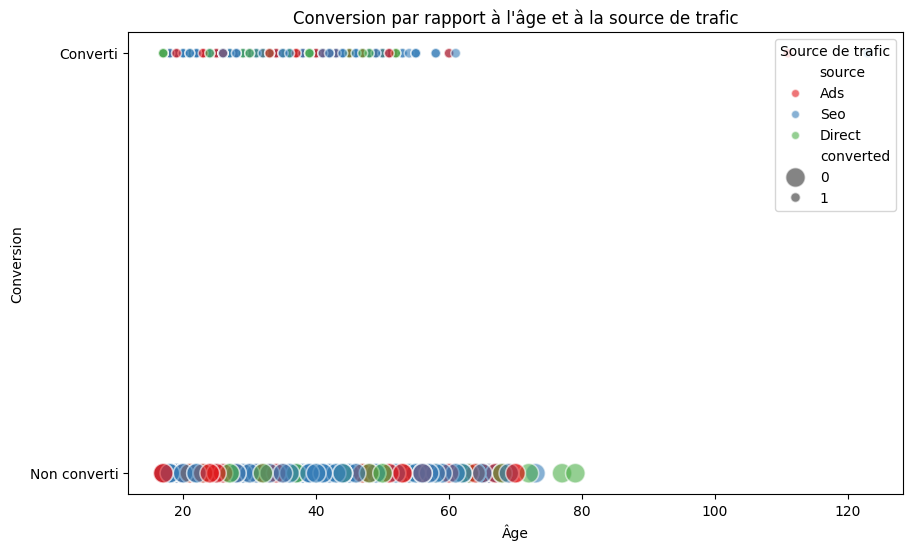

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='converted', hue='source', size='converted', sizes=(50, 200), data=data_train, palette='Set1', alpha=0.6)

# Ajout des titres et labels
plt.title('Conversion par rapport à l\'âge et à la source de trafic')
plt.xlabel('Âge')
plt.ylabel('Conversion')
plt.yticks([0, 1], ['Non converti', 'Converti'])
plt.legend(title='Source de trafic', loc='upper right')

plt.show()


**Optimisation de la Stratégie SEO :**

- Le graphique montre une tendance à une conversion plus élevée pour la source de trafic SEO, en particulier pour les utilisateurs dont l'âge varie entre 15 et 55 ans.
- Il est recommandé de concentrer les efforts d'optimisation de la stratégie SEO sur ce groupe d'âge, en s'assurant que le contenu, les mots-clés et les stratégies de référencement sont spécifiquement adaptés à leurs préférences et besoins.
- En ciblant efficacement ce segment démographique à fort potentiel de conversion, il est possible d'améliorer le rendement global de la stratégie SEO et d'augmenter le taux de conversion global du site web.
